In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 

In [3]:
df = pd.read_csv('data.csv')
df

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0
...,...,...,...,...,...,...,...,...,...,...
7686,"3 BHK Flat for Rent in Saket, New Delhi",Saket,New Delhi,1750.0,3,3,0,Furnished,27.0,47000.0
7687,"2 BHK Flat for Rent in Phase 7 JP Nagar, Banga...",Phase 7 JP Nagar,Bangalore,1050.0,2,2,2,Semi-Furnished,27.0,28000.0
7688,"2 BHK Flat for Rent in Malpani Vivanta, Balewa...",Balewadi,Pune,734.0,2,2,2,Unfurnished,48.0,35000.0
7689,"1 BHK Flat for Rent in Shalimar bagh, New Delhi",Shalimar bagh,New Delhi,400.0,1,1,0,Semi-Furnished,38.0,15000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   house_type  7691 non-null   object 
 1   locality    7691 non-null   object 
 2   city        7691 non-null   object 
 3   area        7691 non-null   float64
 4   beds        7691 non-null   int64  
 5   bathrooms   7691 non-null   int64  
 6   balconies   7691 non-null   int64  
 7   furnishing  7691 non-null   object 
 8   area_rate   7691 non-null   float64
 9   rent        7691 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 601.0+ KB


In [5]:
df['area'] = df['area'].astype(int)
df['area_rate'] = df['area_rate'].astype(int)
df['rent'] = df['rent'].astype(int)


In [6]:
df.isnull().sum()

house_type    0
locality      0
city          0
area          0
beds          0
bathrooms     0
balconies     0
furnishing    0
area_rate     0
rent          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
numeric_feature = [features for features in df.columns if df[features].dtype !='O']
catogarical_feature = [features for features in df.columns if df[features].dtype =='O']

print(numeric_feature,catogarical_feature)

['area', 'beds', 'bathrooms', 'balconies', 'area_rate', 'rent'] ['house_type', 'locality', 'city', 'furnishing']


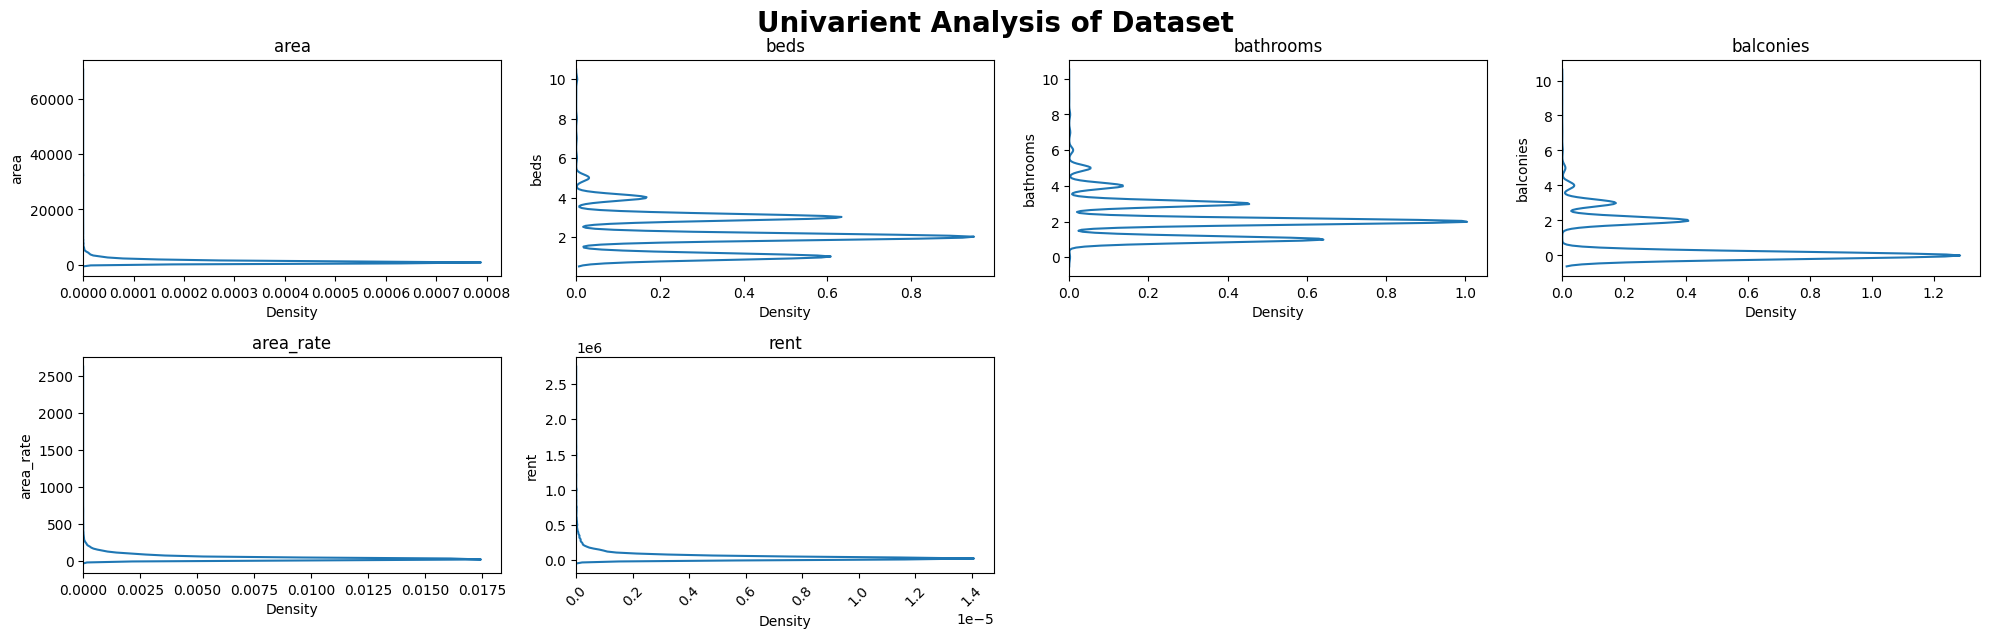

In [9]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univarient Analysis of Dataset', fontsize=20, fontweight='bold')

for idx, col in enumerate(numeric_feature):
    plt.subplot(5, 4, idx + 1)
    sns.kdeplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [10]:
df.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897,2,2,0,Semi-Furnished,134,120000
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490,1,1,0,Semi-Furnished,82,40000
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550,1,1,0,Unfurnished,22,12000
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000,2,2,0,Unfurnished,8,8000
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595,1,1,0,Unfurnished,25,15000


C:\Users\behli\AppData\Local\Temp\ipykernel_23700\2701099727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['locality'],y=df['rent'],palette='hls')


<Axes: xlabel='locality', ylabel='rent'>

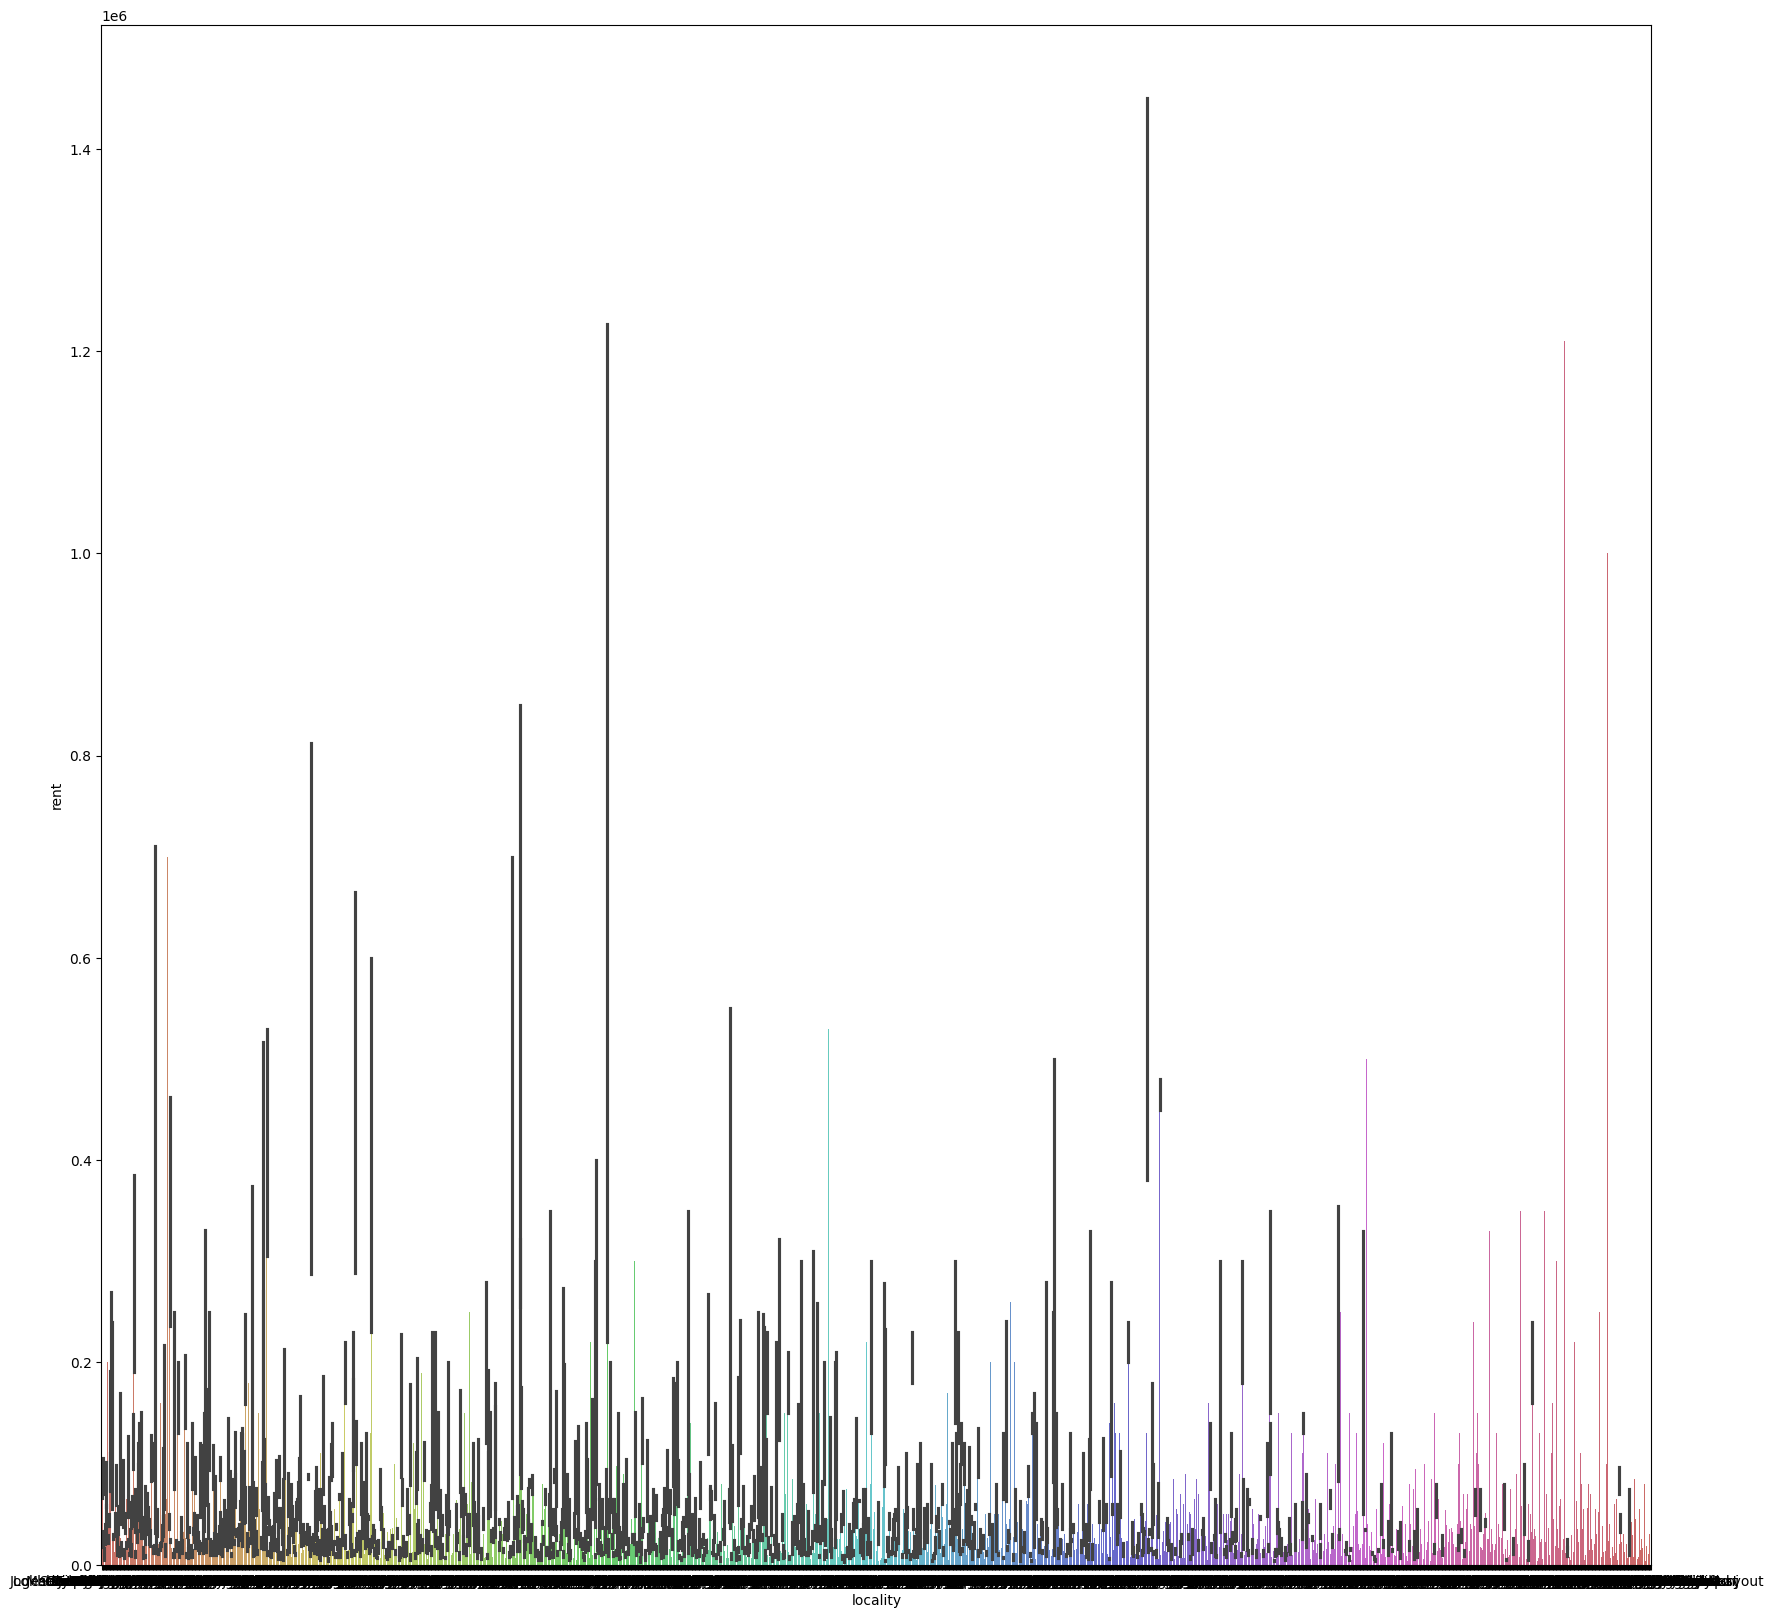

In [19]:
dff= df.groupby(['locality'])['rent'].sum()
plt.figure(figsize=(20,20))
sns.barplot(x=df['locality'],y=df['rent'],palette='hls')